In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,text,sentiment
0,TRAIN_00000,@SenWarren The problem with your massively fla...,2
1,TRAIN_00001,#Tweetlord is a twitter role playing game! Che...,1
2,TRAIN_00002,"I just slammed my elbow into a fridge, I did n...",2
3,TRAIN_00003,_beckett Thanks so much !,1
4,TRAIN_00004,My gauge fell out on superman,2


In [50]:
print(len(train_data))

32000


In [51]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,text
0,TEST_00000,@naima @dialogician Most of this footage is fr...
1,TEST_00001,@Haggis_UK @kevinhollinrake is willing to brea...
2,TEST_00002,‘No Magic Bullet’ for Preserving Abortion Acce...
3,TEST_00003,Can I also have a swirly flat white?
4,TEST_00004,Question: If the trains we have get disabled i...


In [52]:
print(len(test_data))

48000


In [53]:
# Check the unique values and their counts in the sentiment column
sentiment_counts = train_data['sentiment'].value_counts()
sentiment_counts

2    20095
1     8049
0     3856
Name: sentiment, dtype: int64

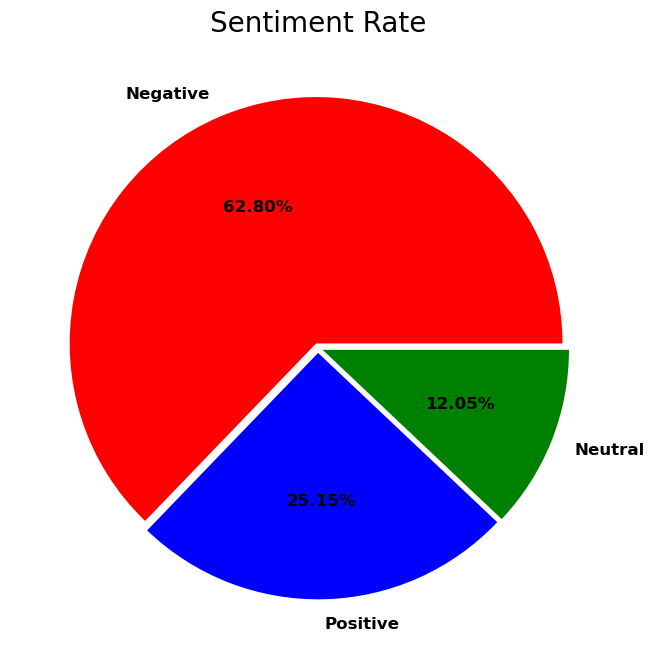

In [54]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(8,8))
plt.title('Sentiment Rate', fontsize=20)

# Create the pie chart
pie = sentiment_counts.plot.pie(autopct='%1.2f%%', 
                                explode=[0.02, 0.02, 0.02], 
                                colors=['red', 'blue', 'green'], 
                                labels=['Negative', 'Positive', 'Neutral'], 
                                textprops={'fontsize': 12, 'weight': 'bold'})
plt.ylabel('')  # Remove the default y-label
plt.show()


In [55]:
def getLength(string):
    if str(type(string)) == "<class 'str'>":
        return len(string)
    else:
        return 0

In [56]:
text_length = train_data['text'].apply(lambda x: getLength(x))

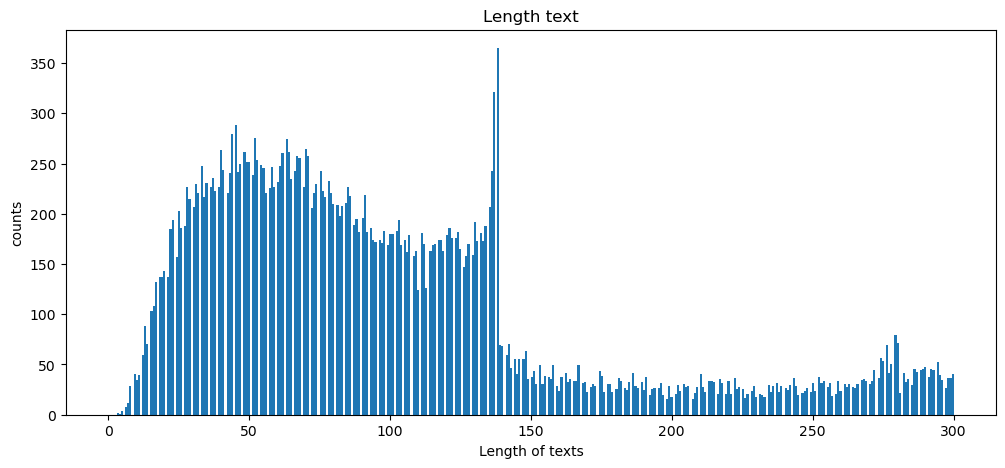

In [57]:
plt.figure(figsize=(12,5))

plt.title('Length text')
plt.ylabel('counts')
plt.xlabel('Length of texts')

hist = plt.hist(text_length, bins=400, range=[0,300])

### 데이터 전처리

In [58]:
import nltk
from nltk.corpus import stopwords

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daehyunkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
stops = set(stopwords.words('english'))

In [61]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from html import unescape

import re

In [62]:
# 'text' 열의 데이터를 선택
train = train_data['text'].str.cat(sep=' ')  # 모든 행의 'text' 데이터를 하나의 문자열로 결합

# HTML 엔터티 제거
train = unescape(train)

# @와 기타 특수 기호 제거
train = re.sub(r'\W*\b\w{1,2}\b', '', train)  # @mention 제거
train = re.sub(r'[^\w\s]', '', train)  # 특수 기호 제거 (알파벳, 숫자, 공백을 제외한 모든 문자 제거)

stop_words = set(stopwords.words('english'))

word_tokens_train = word_tokenize(train)

result = []
for word in word_tokens_train:
    if word not in stop_words:
        result.append(word)

print('불용어 제거 전 :', word_tokens_train[:10], "...", len(word_tokens_train), "words total")
print('불용어 제거 후 :', result[:10], "...", len(result), "words total")

불용어 제거 전 : ['SenWarren', 'The', 'problem', 'with', 'your', 'massively', 'flawed', 'argument', 'one', 'guns'] ... 435234 words total
불용어 제거 후 : ['SenWarren', 'The', 'problem', 'massively', 'flawed', 'argument', 'one', 'guns', 'right', 'constitutionbill'] ... 317227 words total


In [63]:
from collections import Counter

def top_20_train(word_tokens_train):
    token_counts = Counter(word_tokens_train)
    top_20_words = token_counts.most_common(20)
    return top_20_words

print(top_20_train(result))

[('like', 1961), ('get', 1781), ('The', 1396), ('good', 1367), ('one', 1308), ('bad', 1262), ('know', 1207), ('day', 1199), ('got', 1191), ('time', 1144), ('work', 1095), ('think', 1079), ('people', 1052), ('today', 1024), ('going', 1019), ('really', 1014), ('want', 992), ('wrong', 928), ('back', 926), ('see', 919)]


In [64]:
# 필터링 되었는지 확인
word_tokens_train[0:10]

['SenWarren',
 'The',
 'problem',
 'with',
 'your',
 'massively',
 'flawed',
 'argument',
 'one',
 'guns']

In [65]:
# 불용어 여기에 추가 하시면 됩니다.
additional_stopwords = ["The", "one", "day", "https"] # test
stop_words.update(additional_stopwords)

# train 데이터 토큰화 및 불용어 제거
word_tokens_train = word_tokenize(train)
filtered_train = [word for word in word_tokens_train if word not in stop_words]

In [66]:
positive_texts = train_data[train_data['sentiment'] == 1]['text']

# 모든 텍스트를 하나의 문자열로 합치기
pos_String = ' '.join(positive_texts)

In [67]:
negative_texts = train_data[train_data['sentiment'] == 2]['text']

# 모든 텍스트를 하나의 문자열로 합치기
neg_String = ' '.join(negative_texts)

In [68]:
neutral_texts = train_data[train_data['sentiment'] == 0]['text']

# 모든 텍스트를 하나의 문자열로 합치기
neu_String = ' '.join(neutral_texts)

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [70]:
from wordcloud import WordCloud

In [71]:
pos_wordcloud = WordCloud(width=1600, height = 1000, max_font_size=200, colormap='BuGn').generate(pos_String)

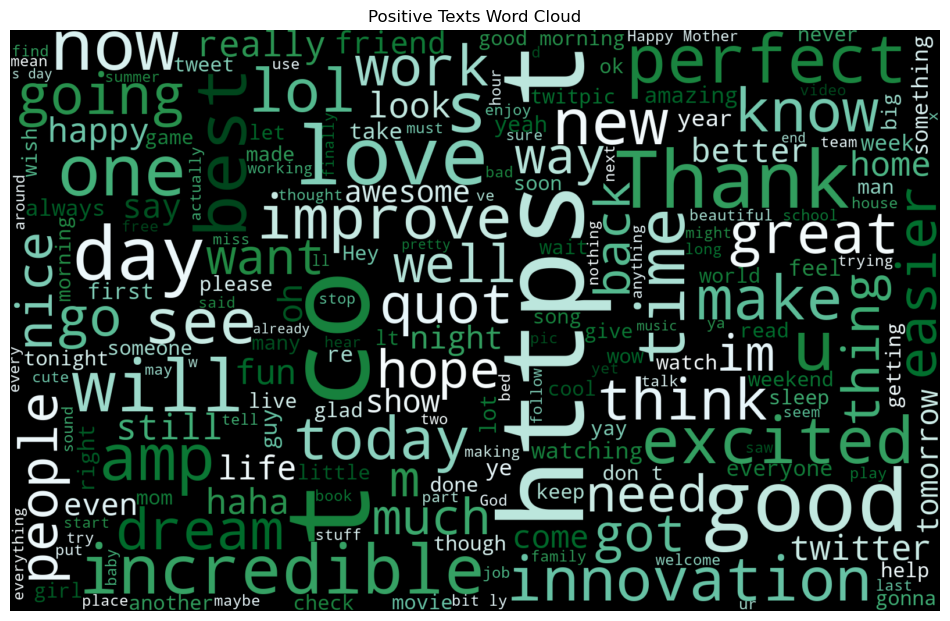

In [72]:
plt.figure(figsize=(12,10))

plt.title('Positive Texts Word Cloud')

plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [73]:
neg_wordcloud = WordCloud(width=1600, height = 1000, max_font_size=200, colormap='OrRd').generate(neg_String)

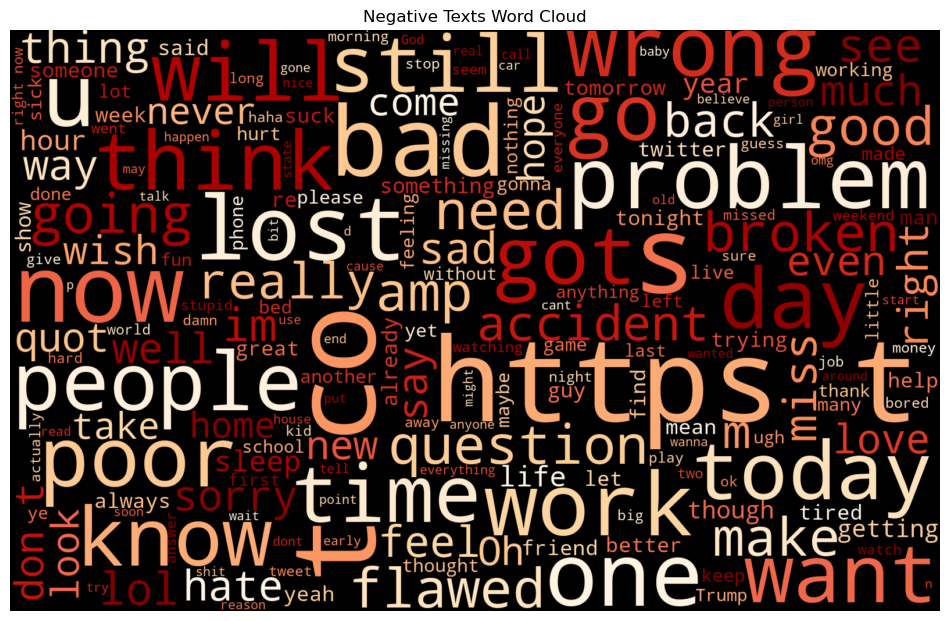

In [74]:
plt.figure(figsize=(12,10))

plt.title('Negative Texts Word Cloud')

plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [75]:
neu_wordcloud = WordCloud(width=1600, height = 1000, max_font_size=200, colormap='gray').generate(neu_String)

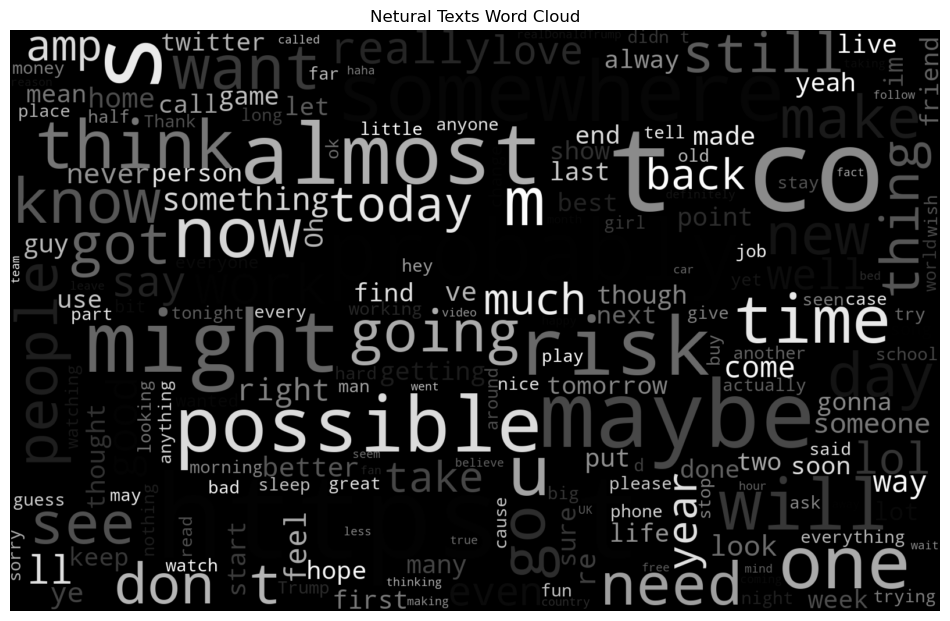

In [76]:
plt.figure(figsize=(12,10))

plt.title('Netural Texts Word Cloud')

plt.imshow(neu_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [77]:
# 32,000개
print(len(positive_texts))
print(len(negative_texts))
print(len(neutral_texts))

8049
20095
3856


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [92]:
# 데이터를 훈련 세트와 검증 세트로 분할
train_input, test_input, train_target, test_target = train_test_split(
    train_data['text'], train_data['sentiment'], test_size=0.2, random_state=42)

In [93]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
train_features = vectorizer.fit_transform(train_input)
test_features = vectorizer.transform(test_input)


In [94]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

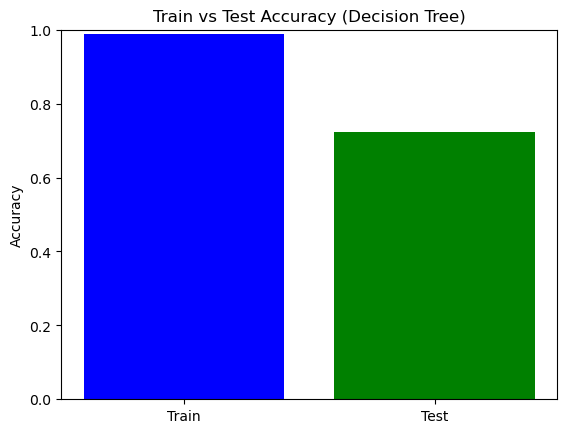

(0.9880078125, 0.721875)

In [95]:
# Training the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_target)

# Calculating accuracies for training and test data
train_accuracy_dt = dt.score(train_features, train_target)
test_accuracy_dt = dt.score(test_features, test_target)

# Plotting the accuracies
labels = ['Train', 'Test']
accuracies_dt = [train_accuracy_dt, test_accuracy_dt]

plt.bar(labels, accuracies_dt, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (Decision Tree)')
plt.ylim(0, 1)
plt.show()

train_accuracy_dt, test_accuracy_dt


### 랜덤포레스트

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(train_features, train_target)
rf.fit(test_features, test_target)

# Evaluate the model on training and validation data
rf_train_score = rf.score(train_features, train_target)

rf_train_score

0.7536328125

In [98]:
# train 평가
from sklearn.metrics import accuracy_score

# Getting predictions from the RandomForest model for the validation set
rf_train_predictions = rf.predict(train_features)
# 모델 성능 평가
from sklearn.metrics import accuracy_score, classification_report

# Model evaluation
print(accuracy_score(train_target, rf_train_predictions))
print(classification_report(train_target, rf_train_predictions))


0.7536328125
              precision    recall  f1-score   support

           0       0.66      0.35      0.46      3075
           1       0.72      0.55      0.62      6425
           2       0.77      0.91      0.83     16100

    accuracy                           0.75     25600
   macro avg       0.72      0.60      0.64     25600
weighted avg       0.74      0.75      0.74     25600



In [99]:
# TF-IDF 벡터화로 테스트 데이터 변환
test_features = vectorizer.transform(test_data['text'])

# 로지스틱 회귀 모델을 사용하여 테스트 데이터에 대한 예측 수행
test_predictions = rf.predict(test_features)

# 예측 결과를 데이터프레임에 추가 (필요한 경우)
test_data['sentiment'] = test_predictions

# (선택 사항) 예측 결과를 CSV 파일로 저장
test_data[['id', 'sentiment']].to_csv('submission.csv', index=False)
